# Daksh Domain and Data Introdcution

**Social Sector Area**: Judicial


A domain here is defined by the related domain knowledge captured in the dataset provided. In the following blocks of information we will be going throw some of the data that is provided and talking about the context that might help understand the data better.

**As understanding of the domain is a very subjective matter we encourage/expect you to raise any questions around it, on github/slack or just talk to the facilitators**

In [23]:
import pandas as pd
import seaborn as sns

%matplotlib inline

### Data: What we are working with?

we are dealing with two tables of data 

1. Cases, each row in the cases table refers to a unique case and its information.
2. Hearing, each row in the hearing table refers to a single hearing held for a given case.

The cases and hearings are recorded by people sitting in different courts and uploaded to government websites as pdfs or data entries. So, courts at different level of **judicial hierarchy** namely, senior civil judge, civil judge, CJM etc in different **districts** are capturing the data.

To make the data consumable in the amount of time we have and to make it manageable we are dealing with a few districts only.
    - Chamrajnagar
    - Kollegal
    - Gundlupet

#### How is the data captured?

The data is scraped at regular intervals by Daksh and stored.

In [6]:
!ls data/

 case_level.csv
 case_level.xlsx
 hearing_level.xlsx
'Population Status Final.xlsx'
 raw
 senior_civil_judge_and_cjm_court,_chamarajanagar_cases.csv
 senior_civil_judge_and_cjm_court,_chamarajanagar_cases_processed.csv
 senior_civil_judge_and_cjm_court,_chamarajanagar_hearings.csv
 senior_civil_judge_and_cjm_court,_chamarajanagar_hearings_processed.csv


**Note**:For ease of consumption we will be talking about Chamrajnagar data, that is already processed such that all columns that are mostly empty are removed.

In [8]:
cases = pd.read_csv('data/senior_civil_judge_and_cjm_court,_chamarajanagar_cases_processed.csv')
hearings = pd.read_csv('data/senior_civil_judge_and_cjm_court,_chamarajanagar_hearings_processed.csv')

In [9]:
cases.shape

(4907, 34)

There are 34 columns that tells us some information in the cases table and for Chamarajanagar we have 4907 cases in our dataset from 2 days worth of scraping data

In [10]:
cases.columns

Index(['Unnamed: 0', 'Id', 'CombinedCaseNumber', 'CaseNumber', 'CaseType',
       'Year', 'CourtName', 'CourtHallNumber', 'DateFiled', 'Petitioner',
       'PetitionerAdvocate', 'Respondent', 'CurrentStatus', 'District',
       'BeforeHonarbleJudges', 'LastSyncTime', 'RespondentType',
       'PetitionerType', 'FilingNumber', 'cnr_number', 'RegistrationDate',
       'RegistrationNo', 'DecisionDate', 'NatureOfDisposal', 'UnderActs',
       'UnderSections', 'CourtState', 'CourtType', 'CourtDistrict',
       'CourtComplex', 'FirstHearingDate', 'ParsingYear', 'Njdg_Judge_Name',
       'Full_Identifier'],
      dtype='object')

In [14]:
# we can get rid off 'Unnamed: 0' column
cases.drop(['Unnamed: 0'], axis=1, inplace=True)

### Columns that don't add Contextual Information

1. Id 
2. CombinedCaseNumber
3. CaseNumber
4. Year
5. LastSyncTime
6. Full identifier


In [18]:
non_contextual_cols = ['Id','CombinedCaseNumber', 'CaseNumber', 'Year', 'LastSyncTime', 'Full_Identifier']
cases[non_contextual_cols].head()

,Id,CombinedCaseNumber,CaseNumber,Year,LastSyncTime,Full_Identifier
0,9c83a4f3-2f80-4ded-82fe-d042c42513e6,EX - Execution Petition Under Order-0169-2002,169,2002,2018-07-01 00:00:01,Karnataka--Chamrajanagar--SENIOR CIVIL JUDGE A...
1,3be745f5-8d3e-4d12-a46c-9bb46b9f0745,EX - Execution Petition Under Order-0075-2002,75,2002,2018-07-01 00:00:03,Karnataka--Chamrajanagar--SENIOR CIVIL JUDGE A...
2,3589a09b-a233-4981-96c1-c4d4da678cfe,EX - Execution Petition Under Order-0368-2002,368,2002,2018-07-01 00:00:06,Karnataka--Chamrajanagar--SENIOR CIVIL JUDGE A...
3,dc958992-1312-4ce8-ba13-491245e6ecf1,EX - Execution Petition Under Order-0044-2002,44,2002,2018-07-01 00:00:07,Karnataka--Chamrajanagar--SENIOR CIVIL JUDGE A...
4,9a0ef0ef-50d4-4585-b0e1-fe71bb317495,EX - Execution Petition Under Order-0367-2002,367,2002,2018-07-01 00:00:08,Karnataka--Chamrajanagar--SENIOR CIVIL JUDGE A...


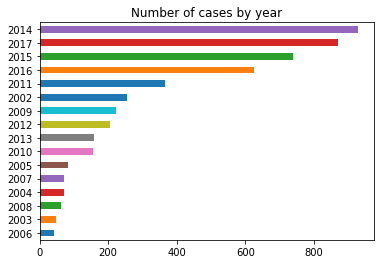

In [27]:
cases.Year.value_counts().sort_values().plot('barh', title='Number of cases by year')

### Columns that add Contextual Information

1. CaseType, Case type describes some of the meta information on what kind of case it is. Some case type definitions given here http://www.lawyersclubindia.com/forum/Court-Abbreviations-For-Law-Students-33260.asp
2. CourtHallNumber, Halls are generally managed by a Judge and can be a representation for a judge
3. DateFiled, tells us when the case was filed.
4. Petitioner, PetitionerAdvocate & PetitionerType are descriptors around who the petitioner is and who is fighting their case
5. Respondent, RespondentType gives information on whom the case is filed.
6. BeforeHonarbleJudges contains information on the judges position who are hearing the case


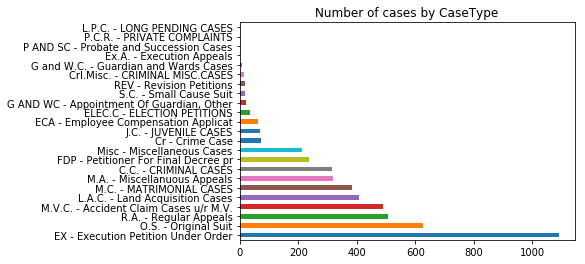

In [29]:
cases.CaseType.value_counts().plot('barh', title='Number of cases by CaseType')

**2 CourtHallNumber, Halls are generally managed by a Judge and can be a representation for a judge**

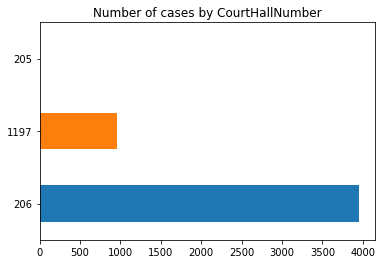

In [32]:
cases.CourtHallNumber.value_counts().plot('barh', title='Number of cases by CourtHallNumber')

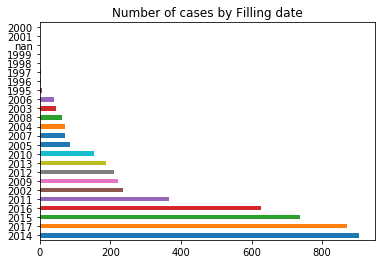

In [35]:
cases.DateFiled.apply(lambda x: str(x).split('-')[0]).value_counts().plot('barh', title='Number of cases by Filling date')

In [36]:
cases[['Petitioner', 'PetitionerAdvocate', 'PetitionerType']].head()

,Petitioner,PetitionerAdvocate,PetitionerType
0,1) PUTTAMALLAMMA ALAMMA DEAD BY LR,N NANJE GOWDA,PETITIONER
1,1) DEAD BY LRS 1LAKSHMINARASIMHA2S RAVISHANKAR...,K. BALASUBRAMANYAM,PETITIONER
2,1) MAHADEVAPPA,S. BASAVANNA,PETITIONER
3,1) DEAD BY LRS AGIDDAMMABMANGALAMMACMAHADEVA G...,N NANJE GOWDA,PETITIONER
4,1) SIDDA MALLAPPA,S. BASAVANNA2),PETITIONER


In [38]:
cases[['Respondent', 'RespondentType']].head()

,Respondent,RespondentType
0,1) THE SPL LAO,RESPONDENT
1,1) G MAHADEVA PRASAD,RESPONDENT
2,1) THE SPECIAL LAND ACQUISITION OFFICER,RESPONDENT
3,1) THE SPECIAL LAND ACQUISITION OFFICER,RESPONDENT
4,1) THE SPECIAL LAND ACQUISITION OFFICER,RESPONDENT


In [39]:
cases[['BeforeHonarbleJudges']].head()

,BeforeHonarbleJudges
0,NaN
1,NaN
2,NaN
3,NaN
4,SENIOR CIVIL JUDGE AND CJM
